#### Feature Importance   

Assign scores to input features to a predictive model (regression and classification)   
that indicates the relative importance of each feature when making a prediction.   

The relative scores can highlight the most and least relevant features.  
Domain experts can interpret the results and gather more or different data.  

Feature importance scores can be fed to a wrapper model, such as the SelectFromModel class, to perform feature selection.

- Feature importance from model coefficients.
- Feature importance from decision trees.
- Feature importance from permutation testing.

##### Generate `make_classification` dataset    

In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


##### Generate `make_regression` dataset   

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


#### Linear regression feature importance   
Prediction is a weighted sum of the input values.   
Linear regression coefficients for feature importance:  

Feature  Importance Score
0       34.06980
1       12.44483
2       -0.00000
3       76.55852
4       93.32225
5       86.50811
6       26.74607
7       3.28535
8       -0.00000
9       -0.00000


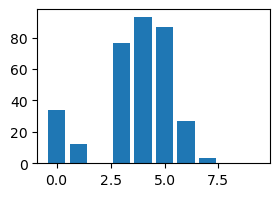

In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=1000, n_features=10, n_informative=7, random_state=1)

model = LinearRegression()
model.fit(X, y)
importance = model.coef_

print("Feature  Importance Score")
for i,v in enumerate(importance):
    print(f'{i}       {v:.5f}')

plt.figure(figsize=(3,2))
plt.bar([x for x in range(len(importance))], importance);


The model found the five important features and marked all other features with a zero coefficient,  
essentially removing them from the model.

#### Decision Tree Feature Importance   
CART offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

After being `fit()`, the model provides a `feature_importances_` property that can be accessed to retrieve the relative importance scores for each input feature.


#### decision tree for feature importance on a regression problem

Feature  Importance Score
0       0.00258
1       0.00422
2       0.00211
3       0.00175
4       0.51749
5       0.43781
6       0.02741
7       0.00280
8       0.00291
9       0.00092


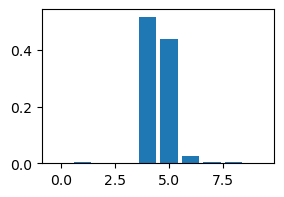

In [5]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
model = DecisionTreeRegressor()
model.fit(X, y)

importance = model.feature_importances_

print("Feature  Importance Score")
for i,v in enumerate(importance):
    print(f'{i}       {v:.5f}')

plt.figure(figsize=(3,2))
pyplot.bar([x for x in range(len(importance))], importance);


#### Check Feature Importance in CART   
Predict sex using features: height, weight, shoe size, shoulder, and waist measurements   


In [6]:
import pandas as pd

In [7]:
def is_male(sex):
    if sex == 'MALE':
        return 1
    else:
        return 0

df = pd.read_excel('../Data/BSc23_Student_Data.xlsx')
df = df.dropna()
df['isMale'] = df.Sex.apply(is_male)
df = df[['Height_cm', 'Weight_Kg', 'Shoe_Size', 'Shoulder_cm', 'Waist_cm', 'isMale']]
df.head()

,Height_cm,Weight_Kg,Shoe_Size,Shoulder_cm,Waist_cm,isMale
0,183.0,78.0,9.0,42.0,81.00,1
1,173.0,62.0,10.0,41.5,88.50,1
5,171.8,81.0,9.0,48.0,100.00,1
8,162.0,50.0,6.0,40.0,86.00,0
11,168.0,69.0,9.0,42.0,91.44,1


Feature  Importance Score
0       0.62964
1       0.13701
2       0.05863
3       0.05667
4       0.11806


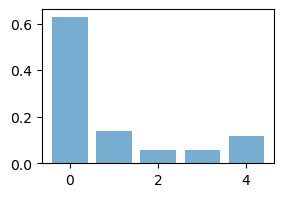

In [8]:
X_train = df[['Height_cm', 'Weight_Kg', 'Shoe_Size', 'Shoulder_cm', 'Waist_cm']].values
y_train = df['isMale'].values

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

importance = model.feature_importances_

print("Feature  Importance Score")
for i,v in enumerate(importance):
    print(f'{i}       {v:.5f}')

plt.figure(figsize=(3,2))
pyplot.bar([x for x in range(len(importance))], importance, alpha=0.6);


- The above values and chart show that height is the most important factor in predicting the sex of a person.  
- Feature importance can be measured for other linear models as well.  

#### Task   
ANSUR data has many body measurements of males and females.  
Take the numerical value columns and check feature importance in predicting the sex of the person.  